In [2]:
import random
import pandas as pd

# Define the size of the dataset
num_records = 1000

# Generate random ages between 18 and 65
ages = [random.randint(18, 65) for _ in range(num_records)]

# Generate random genders (assuming binary)
genders = ['Male' if random.random() < 0.5 else 'Female' for _ in range(num_records)]

# Generate random locations
locations = ['Miami', 'New York', 'Los Angeles', 'Cleveland', 'Austin','Houston', 'Atlanta', 'San Francisco', 'Chicago', 'Orlando']
locations = [random.choice(locations) for _ in range(num_records)]

# Generate random policy types
policy_types = ['Basic', 'Standard', 'Premium']
policy_types = [random.choice(policy_types) for _ in range(num_records)]

# Generate random claim history (number of claims filed)
claim_history = [random.randint(0, 10) for _ in range(num_records)]

# Generate random vehicle types
vehicle_types = ['Sedan', 'SUV', 'Truck', 'Motorcycle']
vehicle_types = [random.choice(vehicle_types) for _ in range(num_records)]

# Generate random marital status
marital_status = ['Married', 'Single', 'Divorced', 'Widowed']
marital_status = [random.choice(marital_status) for _ in range(num_records)]

# Generate random annual income
annual_income = [random.randint(30000, 120000) for _ in range(num_records)]

# Generate random number of dependents
dependents = [random.randint(0, 5) for _ in range(num_records)]

# Generate random Customer Lifetime Value (CLV)
clv = [random.randint(5000, 50000) for _ in range(num_records)]  # Adjust range as needed

# Generate random policy payment amounts
policy_payments = [random.randint(200, 1500) for _ in range(num_records)]  # Adjust range as needed

# Create a DataFrame
data = pd.DataFrame({
    'Age': ages,
    'Gender': genders,
    'Location': locations,
    'Policy_Type': policy_types,
    'Claim_History': claim_history,
    'Vehicle_Type': vehicle_types,
    'Marital_Status': marital_status,
    'Annual_Income': annual_income,
    'Dependents': dependents,
    'CLV': clv,
    'Policy_Payment': policy_payments
})

# Save the DataFrame to a CSV file
data.to_csv('customer_data.csv', index=False)

In [3]:
print(data)

     Age  Gender       Location Policy_Type  Claim_History Vehicle_Type  \
0     56  Female        Orlando     Premium              2        Sedan   
1     18    Male        Chicago     Premium             10        Sedan   
2     56  Female    Los Angeles       Basic              4   Motorcycle   
3     34  Female  San Francisco    Standard             10   Motorcycle   
4     54  Female          Miami     Premium              3          SUV   
..   ...     ...            ...         ...            ...          ...   
995   45  Female        Orlando    Standard              2        Truck   
996   45  Female         Austin       Basic              3        Sedan   
997   42    Male      Cleveland     Premium              2          SUV   
998   44    Male      Cleveland       Basic              3        Truck   
999   37    Male        Houston       Basic              0        Sedan   

    Marital_Status  Annual_Income  Dependents    CLV  Policy_Payment  
0         Divorced          

In [4]:
# Check for missing values
data.isnull().sum()

# No missing values (data cleaned)

Age               0
Gender            0
Location          0
Policy_Type       0
Claim_History     0
Vehicle_Type      0
Marital_Status    0
Annual_Income     0
Dependents        0
CLV               0
Policy_Payment    0
dtype: int64

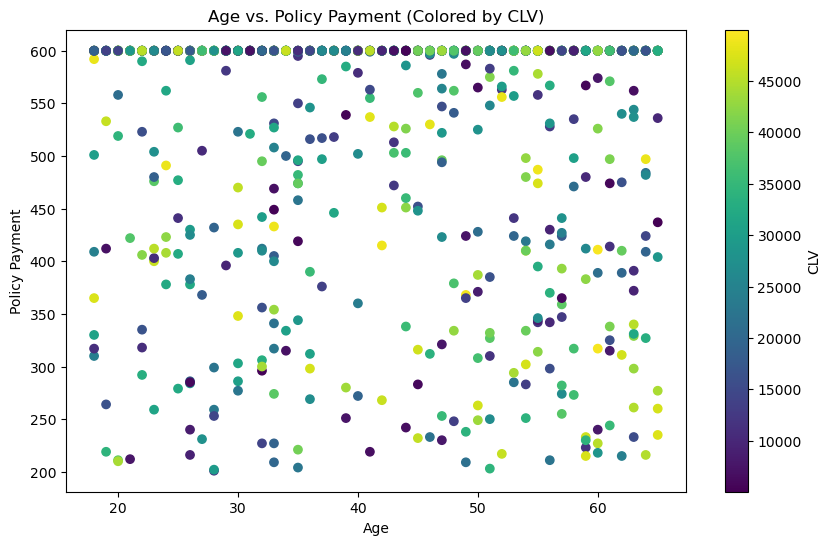

In [6]:
# Restrict Policy_Payment to a maximum of $600
data['Policy_Payment'] = data['Policy_Payment'].apply(lambda x: min(x, 600))

# Scatter plot of Age vs. Policy Payment
plt.figure(figsize=(10, 6))
plt.scatter(data['Age'], data['Policy_Payment'], c=data['CLV'], cmap='viridis')
plt.colorbar(label='CLV')
plt.xlabel('Age')
plt.ylabel('Policy Payment')
plt.title('Age vs. Policy Payment (Colored by CLV)')
plt.show()

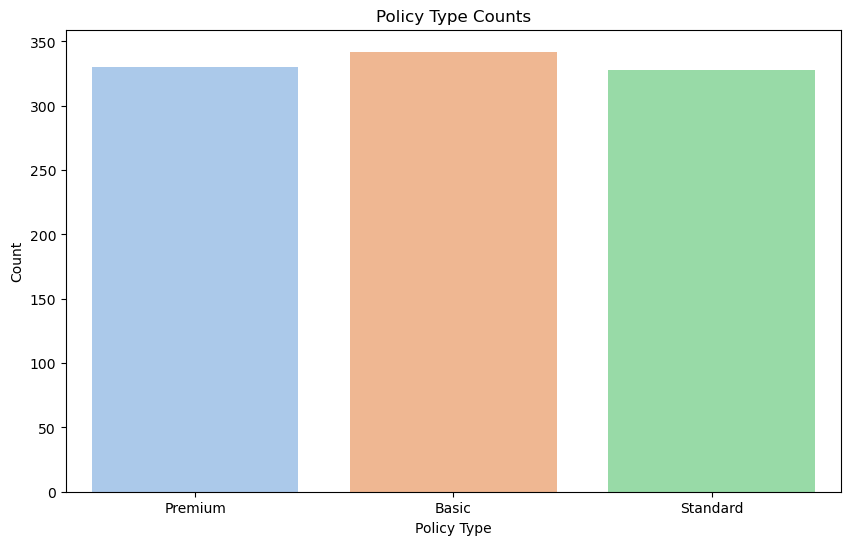

In [7]:
import seaborn as sns

# Bar chart of Policy Type counts
plt.figure(figsize=(10, 6))
sns.countplot(x='Policy_Type', data=data, palette='pastel')
plt.xlabel('Policy Type')
plt.ylabel('Count')
plt.title('Policy Type Counts')
plt.show()

C:\Users\abrah\AppData\Local\Temp\ipykernel_11764\4083217079.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = data.corr()


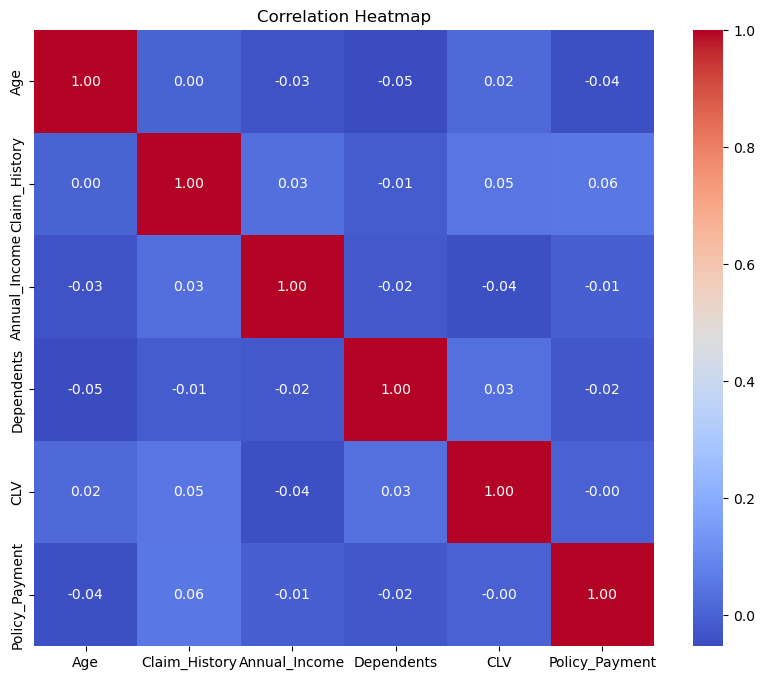

In [8]:
# Calculate correlation matrix
correlation_matrix = data.corr()

# Generate a heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Heatmap')
plt.show()

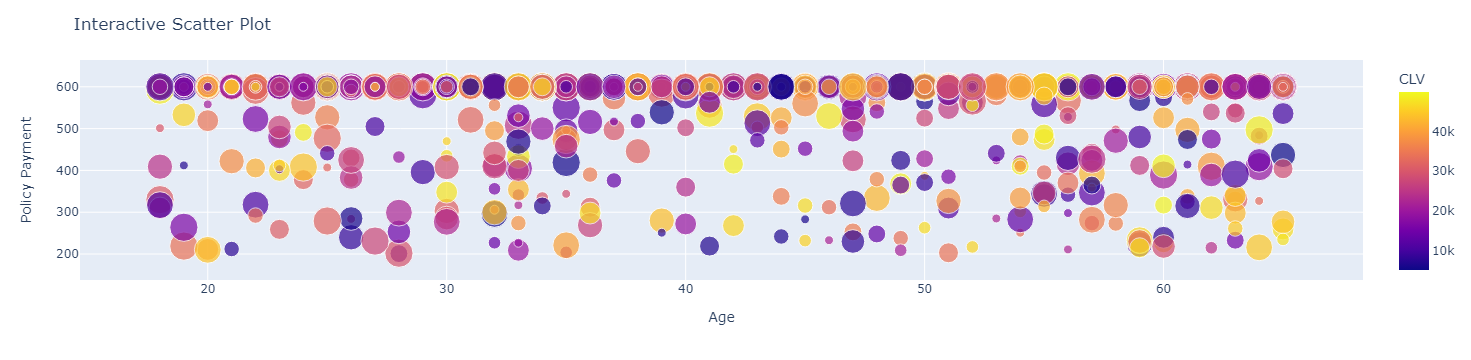

In [13]:
import plotly.express as px

# Interactive scatter plot of Age vs. Policy Payment
fig = px.scatter(data, x='Age', y='Policy_Payment', color='CLV',
                 hover_name='Location', size='Claim_History')
fig.update_layout(title='Interactive Scatter Plot',
                  xaxis_title='Age',
                  yaxis_title='Policy Payment')
fig.show()

In [14]:
# Create a DataFrame for Female Customers
female_data = data[data['Gender'] == 'Female']

# Save the DataFrame to a CSV file
female_data.to_csv('female_customer_data.csv', index=False)

In [26]:
print(female_data)

     Age  Gender       Location Policy_Type  Claim_History Vehicle_Type  \
0     56  Female        Orlando     Premium              2        Sedan   
2     56  Female    Los Angeles       Basic              4   Motorcycle   
3     34  Female  San Francisco    Standard             10   Motorcycle   
4     54  Female          Miami     Premium              3          SUV   
7     61  Female          Miami       Basic              1   Motorcycle   
..   ...     ...            ...         ...            ...          ...   
987   63  Female  San Francisco       Basic              3        Sedan   
992   63  Female    Los Angeles       Basic              9        Sedan   
993   64  Female  San Francisco     Premium              8          SUV   
995   45  Female        Orlando    Standard              2        Truck   
996   45  Female         Austin       Basic              3        Sedan   

    Marital_Status  Annual_Income  Dependents    CLV  Policy_Payment  Cluster  
0         Divorced 

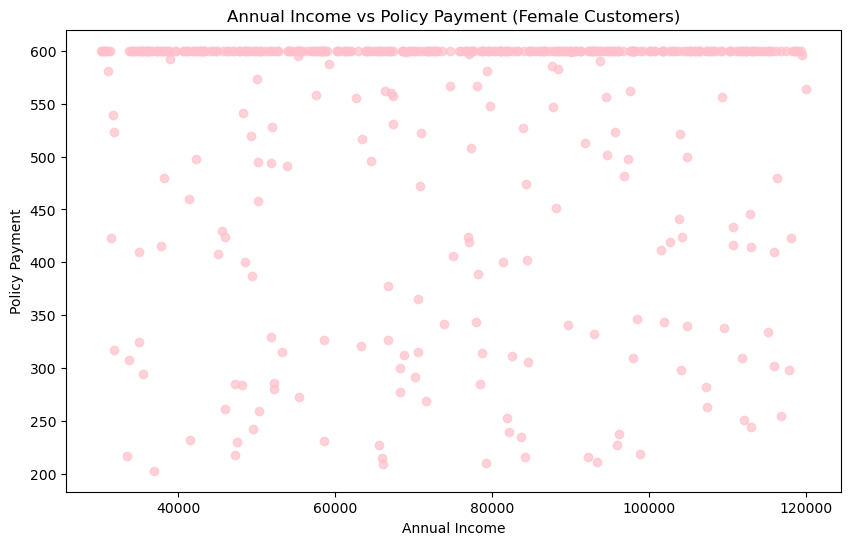

In [27]:
import matplotlib.pyplot as plt

# Scatter plot of Annual Income vs Policy Payment for Female Customers
plt.figure(figsize=(10, 6))
plt.scatter(female_data['Annual_Income'], female_data['Policy_Payment'], color='pink', alpha=0.7)
plt.xlabel('Annual Income')
plt.ylabel('Policy Payment')
plt.title('Annual Income vs Policy Payment (Female Customers)')
plt.show()

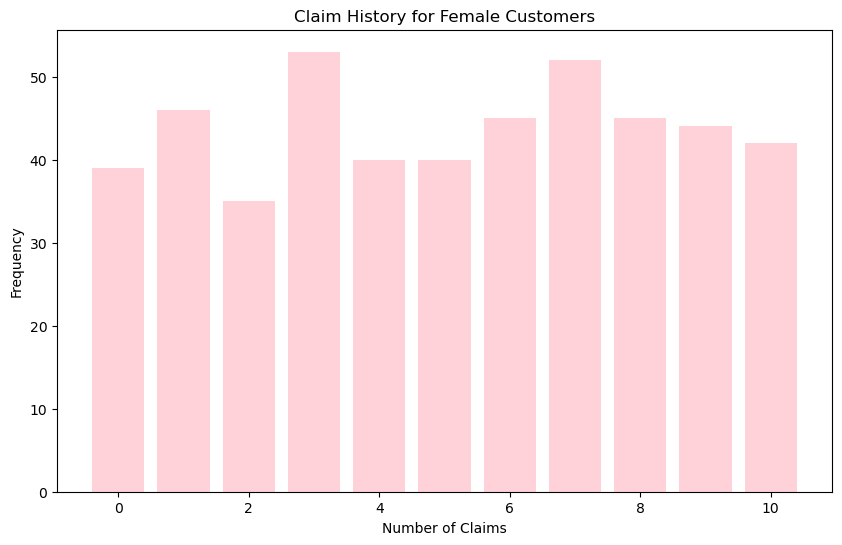

In [28]:
import matplotlib.pyplot as plt

# Bar chart of Claim History for Female Customers
plt.figure(figsize=(10, 6))
plt.bar(female_data['Claim_History'].value_counts().index, 
        female_data['Claim_History'].value_counts().values, 
        color='pink', alpha=0.7)
plt.xlabel('Number of Claims')
plt.ylabel('Frequency')
plt.title('Claim History for Female Customers')
plt.show()


In [23]:
# Create a DataFrame for Male Customers
male_data = data[data['Gender'] == 'Male']

# Save the DataFrame to a CSV file
male_data.to_csv('male_customer_data.csv', index=False)

In [17]:
print(male_data)

     Age Gender       Location Policy_Type  Claim_History Vehicle_Type  \
1     18   Male        Chicago     Premium             10        Sedan   
5     61   Male          Miami    Standard              6        Truck   
6     36   Male        Houston    Standard              2   Motorcycle   
9     55   Male    Los Angeles     Premium              6   Motorcycle   
11    53   Male  San Francisco       Basic              8          SUV   
..   ...    ...            ...         ...            ...          ...   
991   36   Male      Cleveland       Basic              6        Sedan   
994   60   Male          Miami       Basic              5        Truck   
997   42   Male      Cleveland     Premium              2          SUV   
998   44   Male      Cleveland       Basic              3        Truck   
999   37   Male        Houston       Basic              0        Sedan   

    Marital_Status  Annual_Income  Dependents    CLV  Policy_Payment  Cluster  
1          Married          625

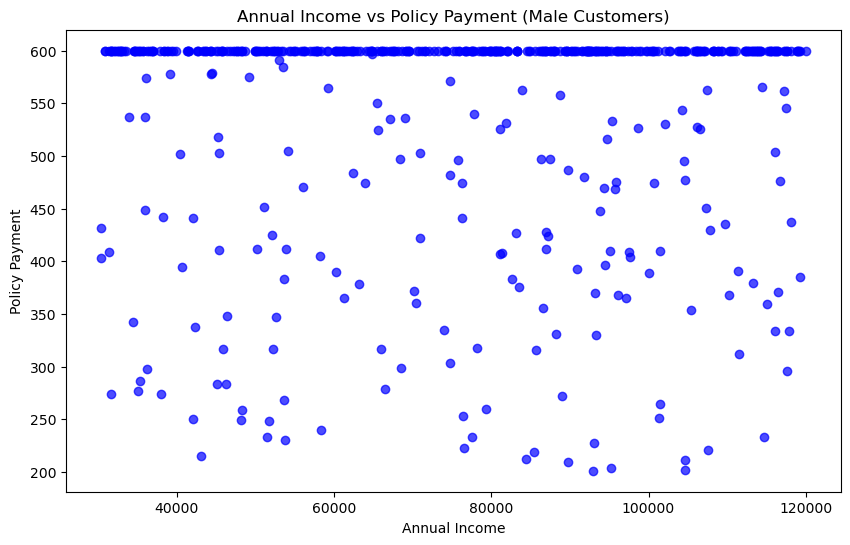

In [25]:
import matplotlib.pyplot as plt

# Scatter plot of Annual Income vs Policy Payment for Male Customers
plt.figure(figsize=(10, 6))
plt.scatter(male_data['Annual_Income'], male_data['Policy_Payment'], color='blue', alpha=0.7)
plt.xlabel('Annual Income')
plt.ylabel('Policy Payment')
plt.title('Annual Income vs Policy Payment (Male Customers)')
plt.show()

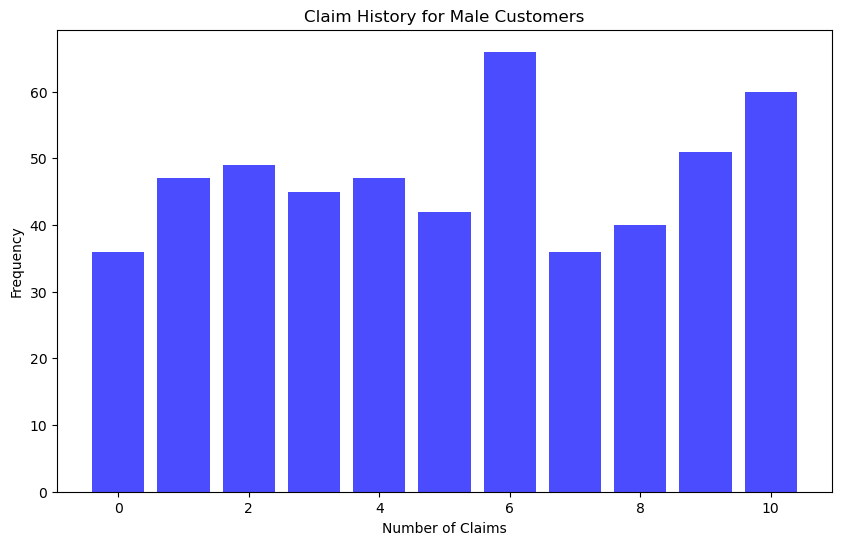

In [29]:
import matplotlib.pyplot as plt

# Bar chart of Claim History for Male Customers
plt.figure(figsize=(10, 6))
plt.bar(male_data['Claim_History'].value_counts().index, 
        male_data['Claim_History'].value_counts().values, 
        color='blue', alpha=0.7)
plt.xlabel('Number of Claims')
plt.ylabel('Frequency')
plt.title('Claim History for Male Customers')
plt.show()